In [ ]:
! git clone https://github.com/dali92002/DocEnTR

Cloning into 'DocEnTR'...
remote: Enumerating objects: 187, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 187 (delta 23), reused 25 (delta 14), pack-reused 136 (from 1)
Receiving objects: 100% (187/187), 12.55 MiB | 11.13 MiB/s, done.
Resolving deltas: 100% (88/88), done.


In [ ]:
pwd

'/content'

In [ ]:
ls

DocEnTR/  sample_data/


In [ ]:
cd DocEnTR/

/content/DocEnTR


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
! python --version

Python 3.9.21


In [ ]:
!cat requirements.txt

einops==0.3.2
matplotlib==3.5.0
numpy==1.21.5
opencv_python==4.5.4.60
Pillow==9.0.0
thinc==8.0.13
torch==1.10.0
torchvision==0.11.1
tqdm==4.62.3
vit_pytorch==0.24.3


In [ ]:
# https://www.kaggle.com/code/alaajah/creating-virtual-environment-on-google-colab
!pip install virtualenv
!sudo apt-get install python3.9
!virtualenv --python="/usr/bin/python3.9" myenv
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local python=3.9 ujson

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 30.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-minimal
Suggested packages:
  python3.9-venv binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-minimal
0 upgraded, 4 newly installed, 0 to remove and 29 not upgraded.
Need to get 4,846 kB of archives.
After this operation, 18.9 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.21-1+jammy1 [837 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal amd64 3.9.21-1+jammy1 [2,075 kB]
Get:3 https://ppa.launchpadcontent.n

In [ ]:
import sys
sys.path.append('/usr/local/lib/python3.9/site-packages/')
import os
os.environ['CONDA_PREFIX'] = '/usr/local/envs/myenv'

In [ ]:
! python --version

Python 3.9.21


In [ ]:
!pip install -r requirements.txt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content/DocEnTR'

In [ ]:
ls "/content/drive/MyDrive/Colab Notebooks"

demo.ipynb             kraken_example.ipynb  Zhukovsky/  КККМ_lines/     КККМ_pickles/     КККМ.zip
kraken_example2.ipynb  weights/              КККМ/       КККМ_lines.zip  КККМ_pickles.zip


In [ ]:
DATA = "/content/drive/MyDrive/Colab Notebooks/"
ZIP_PATH = DATA + "КККМ.zip"

FOLDER = DATA + "КККМ"
FOLDER_BIN = DATA + "КККМ_bin/"

!rm -r "$FOLDER"
!rm -r "$FOLDER_BIN"
!mkdir "$FOLDER_BIN"

!unzip "$ZIP_PATH" -d "$DATA"
print(FOLDER, FOLDER_BIN, sep = "\n")

rm: cannot remove '/content/drive/MyDrive/Colab Notebooks/КККМ_bin/': No such file or directory
Archive:  /content/drive/MyDrive/Colab Notebooks/КККМ.zip
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 10369:27 Мартьяновский музей адрес 1915.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:100 Бартенев.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1000 Сергеева.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1001 Сергеева.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1002 Сергеева.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1003 Сергеева.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1004 Сергеева.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1005 Сергеева.jpeg  
  inflating: /content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1006 Сементовская М.jpeg  
 

In [14]:
import torch
from vit_pytorch import ViT
from models.binae import BinModel
from einops import rearrange
from pathlib import Path
import os
from tqdm import tqdm

In [15]:
pwd

'/content/DocEnTR'

In [16]:
!ls "/content/drive/MyDrive/Colab Notebooks/weights/"

blla.mlmodel  model_8_2018_base.pt


In [17]:
# !mkdir weights
# !cp "/content/drive/MyDrive/Colab Notebooks/weights/model_8_2018_base.pt" "/content/DocEnTR/weights"

## Specify the configurations that you want to use to build your model

Here, pick the desired configuration depending on the weights that you downloaded from our repository. The weights can be downloaded from; https://github.com/dali92002/DocEnTR in the Section Model Zoo.

In [18]:
THRESHOLD = 0.5  ## binarization threshold after the model output
WORKERS = 4
SPLITSIZE = 256  ## your image will be divided into patches of 256x256 pixels
BATCH_SIZE = 1
# OUTPUT_PATH = Path("./demo/cleaned")  #TODO: Add your desired output path here
OUTPUT_PATH = Path(FOLDER_BIN)
setting = "base"  ## choose the desired model size [small, base or large], depending on the model you want to use
patch_size = 8  ## choose your desired patch size [8 or 16], depending on the model you want to use
dataset_year = 2018
image_size = (SPLITSIZE, SPLITSIZE)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [19]:
if setting == 'base':
    encoder_layers = 6
    encoder_heads = 8
    encoder_dim = 768

elif setting == 'small':
    encoder_layers = 3
    encoder_heads = 4
    encoder_dim = 512

elif setting == 'large':
    encoder_layers = 12
    encoder_heads = 16
    encoder_dim = 1024
else:
    raise ValueError("Invalid setting!")

## Build your model
Build the transformer autoencoder model

In [20]:
v = ViT(
    image_size=image_size,
    patch_size=patch_size,
    num_classes=1000,
    dim=encoder_dim,
    depth=encoder_layers,
    heads=encoder_heads,
    mlp_dim=2048
)
model = BinModel(
    encoder=v,
    decoder_dim=encoder_dim,
    decoder_depth=encoder_layers,
    decoder_heads=encoder_heads
)

model = model.to(device)

## Load the pretrained weights that were downloaded from our repo:
Here, give the path of the downloaded weights and load them to use a trained model.

In [23]:
path = DATA + "weights"
model_path = Path(path, f"model_{patch_size}_{dataset_year}_{setting}.pt")  # TODO: Add the path to the model weights path here
model.load_state_dict(torch.load(model_path, map_location=device))

<All keys matched successfully>

In [24]:
import matplotlib.pyplot as plt

def showimg(img, torch_mode: bool = False):
    if torch_mode:
        img = torch.permute(img, (1, 2, 0))
    plt.figure()
    plt.imshow(img)
    plt.show()
    plt.close()

## Read the degraded image

Here specify the location of the degraded image that you want to clean. and then read it. We also can visualize it before cleaning. Here I have a folder named demo that contain two folders named degraded and cleaned, the degraded contain the degraded image and the cleaned will contain later the obtained results. But you can specify your own names of folders.

In [25]:
import math

from torch.utils.data import Dataset, DataLoader
from typing import Dict, Any, List, Tuple, Optional
from numpy.typing import ArrayLike
import numpy as np
import cv2

import torch

Height = int
Width = int

ImageShape = Tuple[Height, Width]


class BinarisationDataset(Dataset):
    def __init__(
            self,
            fnames: List[Path],
            imshape: Optional[ImageShape] = None,
    ) -> None:
        super().__init__()
        self.fnames = fnames
        self.imshape = imshape

    def __len__(self) -> int:
        return len(self.fnames)

    def __getitem__(self, item: int) -> Dict[str, Any]:
        img, og_shape, rs_shape = self._load_image(self.fnames[item])
        img = torch.tensor(img)
        return {
            "img": img,
            "og_shape": og_shape,
            "rs_shape": rs_shape,
            "fn_shape": self.imshape or (img.shape[0], img.shape[1]),
            "fname": self.fnames[item],
        }

    def _load_image(self, path: Path) -> Tuple[ArrayLike, ImageShape, ImageShape]:
        img = cv2.imread(str(path))
        og_shape = img.shape[0], img.shape[1]

        if self.imshape is not None:
            img, rs_shape = self._proportional_scaling(img)
        else:
            rs_shape = og_shape

        # This is a bug of the original training of the model. The code expects
        # OpenCV BGR images, but it normalises using RGB constants. If you re-train,
        # take this into consideration and switch the code approppriately.
        # Otherwise, if using the official checkpoints, you should use this code
        # as is.
        # Thankfully, thanks to the magic of Deep Learning(tm), the model works
        # regardless.

        # img = (cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255).astype('float32')  # height, width, 3
        img = (img / 255).astype('float32')  # height, width, 3

        return img, og_shape, rs_shape

    def _proportional_scaling(self, img: ArrayLike) -> Tuple[ArrayLike, ImageShape]:
        """Scale image to a set width and height with padding."""
        img_height, img_width, img_channels = img.shape

        assert self.imshape is not None, "No resizing should be done if shape is None"
        height, width = self.imshape

        factor = min(height / img_height, width / img_width)
        new_height, new_width = int(img_height * factor + 0.999), int(
            img_width * factor + 0.999
        )

        img = cv2.resize(img, (new_width, new_height))
        padded = np.zeros((*self.imshape, img_channels), dtype=img.dtype)
        padded[:new_height, :new_width, :] = img

        return padded, (new_height, new_width)

    # You can implement your own dataset by writing a function that selects the images
    # to clean and passes them to the constructor as a list.
    @classmethod
    def from_old_docs(cls, root_path: Path, imshape: Optional[ImageShape]) -> "BinarisationDataset":
        return BinarisationDataset(list(root_path.glob("*/*.jpg")), imshape)

## Split and Merge functions

Here, two function that are used for splitting an image into patches and merge a list of patches into an image.

In [26]:
class PatchProcessor:
    MEAN = torch.Tensor(np.array([0.485, 0.456, 0.406]))
    STD = torch.Tensor(np.array([0.229, 0.224, 0.225]))

    def __init__(self, nsize1: int, nsize2: int) -> None:
        self.nsize1 = nsize1
        self.nsize2 = nsize2

    def split(self, img: torch.Tensor) -> torch.Tensor:
        """Convert image into a set of patches."""
        # im: h x w x 3
        patches = rearrange(img, "(h p1) (w p2) c -> (h w) p1 p2 c", p1=self.nsize1, p2=self.nsize2, c=3)
        return patches

    def merge_image(self, patches: torch.Tensor, h: int, w: int) -> torch.Tensor:
        """Convert patches back into an image."""
        #patches: npatches x hpatch x wpatch x 3
        img = rearrange(patches, "(h w) p1 p2 c -> (h p1) (w p2) c", p1=self.nsize1, p2=self.nsize2, c=3,
                        h=h // self.nsize1, w=w // self.nsize2)
        return img

    def normalize_patches(self, patches: torch.Tensor) -> torch.Tensor:
        """Apply normalization on the color of the patches."""
        # patches: npatches x hpatch x wpatch x 3
        patches = (patches - self.MEAN[None, None, None, :]) / self.STD[None, None, None, :]
        return patches

    def unnormalize_patches(self, patches: torch.Tensor):
        # patches: npatches x hpatch x wpatch x 3
        patches = (patches * self.STD[None, None, None, :]) + self.MEAN[None, None, None, :]
        return patches

    @staticmethod
    def _closest_multiple(num: int, multiple: int) -> int:
        return (math.ceil(num / multiple)) * multiple

    def prepare_image(self, image: torch.Tensor):
        """Split the image intop patches, an image is padded first to make it dividable by the split size."""
        # image: h x w x 3
        h = self._closest_multiple(image.shape[0], self.nsize1)
        w = self._closest_multiple(image.shape[1], self.nsize2)

        image_padded = torch.ones((h, w, 3))
        image_padded[:image.shape[0], :image.shape[1], :] = image
        patches = self.split(image_padded)
        patches = self.normalize_patches(patches)
        # patches: npatches x hpatch x wpatch x 3
        return patches

    def unprepare_image(self, patches, rs_shape: ImageShape, fn_shape: ImageShape) -> torch.Tensor:
        # patches: npatches x hpatch x wpatch x 3
        h = self._closest_multiple(fn_shape[0], self.nsize1)
        w = self._closest_multiple(fn_shape[1], self.nsize2)

        patches = self.unnormalize_patches(patches)
        image = self.merge_image(patches, h, w)

        # image: h' x w' x 3
        image = image[:rs_shape[0], :rs_shape[1], :]

        return image


class PatchCollator:
    def __init__(self):
        self.processor = PatchProcessor(SPLITSIZE, SPLITSIZE)

    def get_processor(self) -> PatchProcessor:
        return self.processor

    def collate_fn(self, batch):
        output = {
            "patches": [],
            "npatches": [],
            "end_indices": [],
            "fnames": [],
            "og_shapes": [],
            "rs_shapes": [],
            "fn_shapes": [],
        }
        for sample in batch:
            img, og_shape, rs_shape, fn_shape, fname = sample["img"], sample["og_shape"], sample["rs_shape"], sample[
                "fn_shape"], sample["fname"]
            patches = self.processor.prepare_image(img)
            output["patches"].append(patches)
            output["npatches"].append(len(patches))
            output["fnames"].append(fname)
            output["og_shapes"].append(og_shape)
            output["rs_shapes"].append(rs_shape)
            output["fn_shapes"].append(fn_shape)
            output["end_indices"].append(
                len(patches) if len(output["end_indices"]) == 0 else output["end_indices"][-1] + len(patches))
        output["patches"] = torch.cat(output["patches"], dim=0)
        return output


In [27]:
list(Path(FOLDER).glob("*"))[990:1000]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1929 Муромов.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:193 Бессонова.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1930 Муромов.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1931 Муромов.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1932 Муромов.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1933 Муромов.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1934 Михайлов К.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1935 Михайлов К.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1936 Михайлов К.jpeg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/КККМ/КККМ ОФ 7928:1937 Михайлов В.jpeg')]

In [28]:
len(os.listdir(FOLDER)) - 1 - 1 + 19 + 27

2654

In [29]:
paths = [[x[0] + "/" + i for i in x[2]] for x in os.walk(FOLDER)]
PATHS = []
for i in paths:
    PATHS += i

PATHS = [Path(i) for i in PATHS]
len(PATHS)

2654

In [30]:
collator = PatchCollator()
# dataset = BinarisationDataset(list(Path("./demo/degraded/").glob("*")))  # TODO: Change your dataset here
dataset = BinarisationDataset(PATHS)

dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=False, collate_fn=collator.collate_fn,
                        num_workers=WORKERS, pin_memory=False, drop_last=False)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


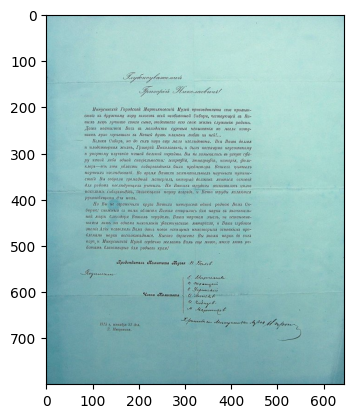

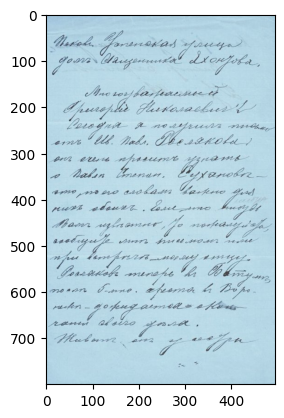

In [31]:
showimg(dataset[0]["img"])
showimg(dataset[1]["img"])

## Clean your image with the trained model

Clean your list of patches obe by one.

In [32]:
def export_image(pred_patches: torch.Tensor, batch: Dict[str, Any]) -> None:
    prev = 0
    if not os.path.exists(OUTPUT_PATH):
        os.makedirs(OUTPUT_PATH)
    for jj, (end_ind, og_shape, rs_shape, fn_shape, fname) in enumerate(
            zip(batch["end_indices"], batch["og_shapes"], batch["rs_shapes"], batch["fn_shapes"], batch["fnames"])):
        img_patches = pred_patches[prev: end_ind]
        img_clean = processor.unprepare_image(img_patches, rs_shape, fn_shape)
        prev = end_ind
        img_clean = (img_clean.numpy() > THRESHOLD) * 255
        img_clean = img_clean.astype(np.uint8)
        # showimg(cv2.cvtColor(img_clean, cv2.COLOR_RGB2BGR))
        cv2.imwrite(str(OUTPUT_PATH / f"{fname.stem}.png"), cv2.cvtColor(img_clean, cv2.COLOR_RGB2BGR))

In [33]:
from multiprocessing.pool import ThreadPool

thread_pool = ThreadPool(8 - WORKERS)
result = []
processor = collator.get_processor()

for ii, batch in tqdm(enumerate(dataloader)):
    train_in = batch["patches"]

    with torch.no_grad():
        train_in = train_in.to(device)
        train_in = train_in.permute(0, 3, 1, 2)  # b, ch, h, w
        any_img = torch.rand(train_in.shape).to(device)
        _, _, pred_patches = model(train_in, any_img)
        pred_patches = torch.squeeze(
            rearrange(pred_patches, 'b (h w) (p1 p2 c) -> b (h p1) (w p2) c', p1=patch_size, p2=patch_size,
                      h=image_size[0] // patch_size))
        pred_patches = pred_patches.detach().cpu()
        export_thread = thread_pool.apply(export_image, [pred_patches, batch])

2654it [28:48,  1.54it/s]


In [35]:
import os
len(os.listdir(DATA + "КККМ_bin"))

2654

# Сохранение результата

In [36]:
%cd "/content/drive/MyDrive/Colab Notebooks/"

/content/drive/MyDrive/Colab Notebooks


In [37]:
ls

demo.ipynb             kraken_example.ipynb  Zhukovsky/  КККМ_bin/    КККМ_pickles/
kraken_example2.ipynb  weights/              КККМ/       КККМ_lines/  КККМ.zip


In [ ]:
rm КККМ_bin.zip

In [38]:
!zip -r "КККМ_bin.zip" "КККМ_bin"

  adding: КККМ_bin/ (stored 0%)
  adding: КККМ_bin/КККМ ОФ 10369:27 Мартьяновский музей адрес 1915.png (deflated 34%)
  adding: КККМ_bin/КККМ ОФ 7928:100 Бартенев.png (deflated 33%)
  adding: КККМ_bin/КККМ ОФ 7928:1000 Сергеева.png (deflated 34%)
  adding: КККМ_bin/КККМ ОФ 7928:1001 Сергеева.png (deflated 33%)
  adding: КККМ_bin/КККМ ОФ 7928:1002 Сергеева.png (deflated 36%)
  adding: КККМ_bin/КККМ ОФ 7928:1003 Сергеева.png (deflated 37%)
  adding: КККМ_bin/КККМ ОФ 7928:1004 Сергеева.png (deflated 33%)
  adding: КККМ_bin/КККМ ОФ 7928:1005 Сергеева.png (deflated 35%)
  adding: КККМ_bin/КККМ ОФ 7928:1006 Сементовская М.png (deflated 33%)
  adding: КККМ_bin/КККМ ОФ 7928:1007 Сементовская М.png (deflated 31%)
  adding: КККМ_bin/КККМ ОФ 7928:1008 Сементовская В.png (deflated 35%)
  adding: КККМ_bin/КККМ ОФ 7928:1009 Сементовская В.png (deflated 33%)
  adding: КККМ_bin/КККМ ОФ 7928:101 Бартенев.png (deflated 31%)
  adding: КККМ_bin/КККМ ОФ 7928:1010 Сапожников.png (deflated 35%)
  adding: К

In [39]:
print(111111111111111)

111111111111111


In [ ]:
!unzip КККМ_bin.zip -d "."

In [ ]:
len(os.listdir("КККМ"))

2610

In [ ]:
len(os.listdir("КККМ_lines/КККМ"))

2611

In [ ]:
len(os.listdir("КККМ_pickles/КККМ"))

2611